## Final Project Submission

Please fill out:
* Student name: Sophia Mbataru
* Student pace: Full time
* Scheduled project review date/time: 30/09/2022
* Instructor name: Lucille, Antonny, William, Nikita
* Blog post URL: NIL


# Analysis and Prediction of House Sales in King County, USA

# Business Understanding

   King County is a county located in the U.S. state of Washington. most populous county in Washington, and the 13th-most populous in the United States thus explaining the housing crisis in the region. the houses in King County comprises of a variety of features, for example, bedrooms, bathrooms/bedroom, area of the house and lot, presence of a waterfront, views, condition of the house, grade assigned by the county, built year, renovated year and the location of the house. 
    The house prices and its spatial distribution are important for stakeholders in the real estate business particularly in metropolitan areas. Stakeholders, such as, external customers looking to purchase or sell a house in King County, they would require to decide on the house to choose based on the variety of parameters associated with the house prices. The objective of the study is to use statistical analysis to find the dependence of these variables on the price of houses, and which parameters affect the housing prices and which variables have minimal affect on the price of houses. The statistical tools used are T-test, Correlation nad Regression. Insights between the variables are drawn from boxplots, histogram, corrgrams.


Hypothesis H1; The price of Houses depends on bedrooms, bathrooms, floors, grade, sqft_living.

Hypothesis-A: The average price of houses with over 3 bathrooms are higher than the price of houses three bathrooms or lower. 

Hypothesis-B: The average no. of views with a waterfront are higher than the no. of views without a waterfront

# Data Understanding
The dataset we have taken is House sales in King County, which can be found in kc_house_data.csv in the data folder. The data contains the prices of houses against a variety of parameters. 


In [24]:
#import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures


## Importing the Data


In [9]:
file_name = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df = pd.read_csv(file_name)

In [10]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
df.info()
#date is the only  non-numeric feature(object)
#address it using ordinal or one-hot (dummy) encoding.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

## Data Cleaning


In [12]:
df.drop(["id", "Unnamed: 0"], axis = 1, inplace = True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
#check for missing values 
df.isnull().sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

The columns bedrooms and bathrooms have missing values.
We can remedy that by replacnig the missing values with the mean of the respective columns using the method replace().

In [14]:
bedrooms_mean = df["bedrooms"].mean()
df['bedrooms'].replace(np.nan, bedrooms_mean , inplace = True)

In [15]:
bathrooms_mean = df['bathrooms'].mean()
df['bathrooms'].replace(np.nan, bathrooms_mean, inplace = True)

# Data Preparation

# Modeling

Let's look at correlations between the other variables and `price`:

In [16]:
df.corr()["price"]

price            1.000000
bedrooms         0.308797
bathrooms        0.525738
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

Since correlation is a measure related to regression modeling, we can see that there seems to be some features that have medium-to-strong correlations with price. These features are sqft_living, grade,sqft_above, sqft_living15, and bathrooms.

The feature sqft_living has the strongest correlations, let's build a simple linear regression model and work with that as the baseline for our multiple linear regression model.

In [29]:
y = df['price'] #Our target variable
baseline_model = sm.OLS(y, sm.add_constant(df['sqft_living'])).fit()
print(baseline_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:38:13   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.358e+04   4402.690     -9.899      

### Simple Linear Regression Results
The model is statistically significant overall, with an F-statistic p-value well below 0.05
The model explains about 50% of the variance in price
The model coefficients (const and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05
If a house had a square foot of 0, we would expect price to be about -4.358e+04
For each increase of 1 lb in house square foot, we see an associated increase in price of about 280.6236 


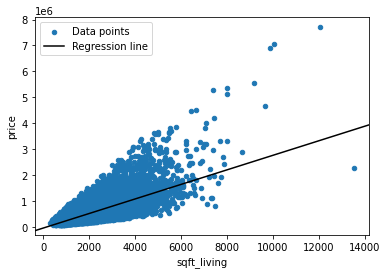

In [35]:
figfig, ax = plt.subplots()
df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_model, label="Regression line", ax=ax, color="black")
ax.legend();

And the residuals:

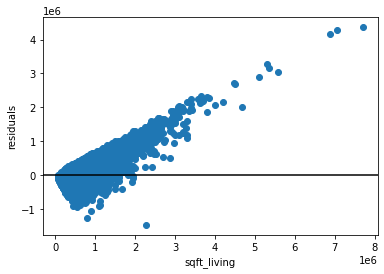

In [34]:
fig, ax = plt.subplots()

ax.scatter(df["price"], baseline_model.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

### Multiple Regression with Many Features 

These additional features are grade, sqft_above, sqft_living15, bathrooms


In [46]:
#create a subset of the variables with the highest correlation for plotting
# drop price because this is our target, then only select numeric features


df_subset = df[['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']].copy()
features_all = df_subset.drop("price", axis=1).select_dtypes("number")
features_all

,sqft_living,grade,sqft_above,sqft_living15,bathrooms
0,1180,7,1180,1340,1.00
1,2570,7,2170,1690,2.25
2,770,6,770,2720,1.00
3,1960,7,1050,1360,3.00
4,1680,8,1680,1800,2.00
...,...,...,...,...,...
21608,1530,8,1530,1530,2.50
21609,2310,8,2310,1830,2.50
21610,1020,7,1020,1020,0.75
21611,1600,8,1600,1410,2.50


In [47]:
model = sm.OLS(y, sm.add_constant(features_all)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     5159.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:58:53   Log-Likelihood:            -2.9911e+05
No. Observations:               21613   AIC:                         5.982e+05
Df Residuals:                   21607   BIC:                         5.983e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.464e+05   1.35e+04    -47.834

### Model with Many Features Visualization 

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


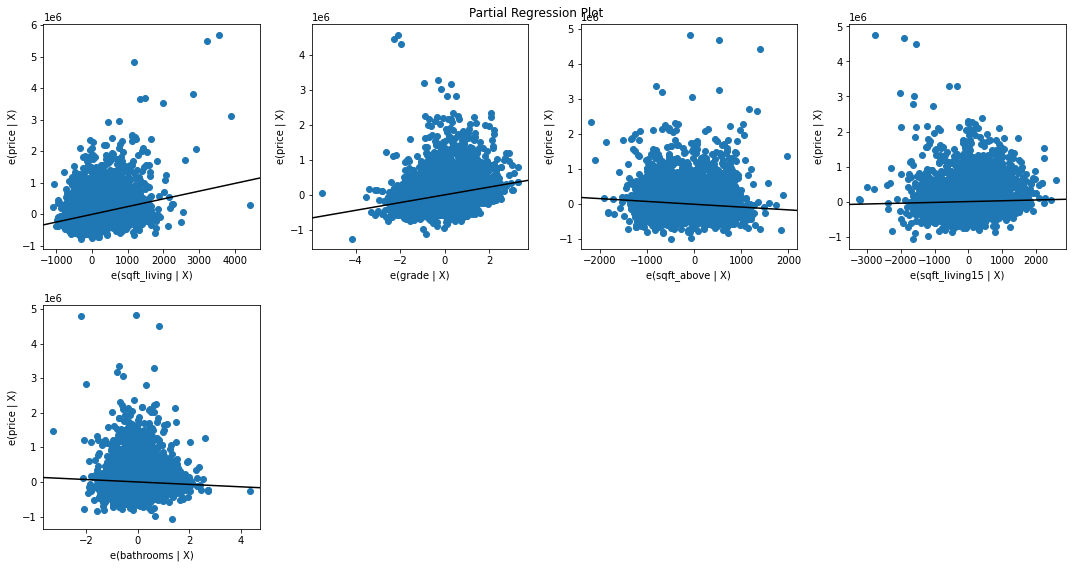

In [48]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    model,
    exog_idx=list(features_all.columns.values),
    grid=(2,4),
    fig=fig)
plt.show()

# Evaluation